In [2]:
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np

In [5]:
import warnings as wn
import random

In [19]:
def percent_plot(ds, plot, title, red, orange, yellow, col, lb, depth):
    if red:
        if col == None:
            col = 'teal'
        if lb == None:
            lb = 'MI < 1'
        ds_red = ~np.isnan(ds.where(ds['MI']<1.0))
        ds_rSum = ds_red['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
        ds_rPercent = (ds_rSum/total)*100
        plot.plot(np.unique(ds_rPercent['time.year']),ds_rPercent.groupby('time.year').mean(),color='teal',label='MI < 1')
        if depth == 'k01':
            plot.set_ylim(-0.2,6)
        if depth == 'irr0.1' or depth == 'k11':
            plot.set_ylim(0,1.5)
        
    if orange:
        if col == None:
            col = 'dodgerblue'
        if lb == None:
            lb = 'MI < 2'
        ds_orange = ~np.isnan(ds.where(ds['MI']<2.0))
        ds_oSum = ds_orange['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
        ds_oPercent = (ds_oSum/total)*100
        plot.plot(np.unique(ds_oPercent['time.year']),ds_oPercent.groupby('time.year').mean(),color='dodgerblue',label='MI < 2')
        if depth == 'k01':
            plot.set_ylim(15,30)
        if depth == 'irr0.1':
            plot.set_ylim(3,11)
        if depth == 'k11':
            plot.set_ylim(2,15)
    
    if yellow:
        if col == None:
            col = 'cyan'
        if lb == None:
            lb = 'MI < 3'
        ds_yellow = ~np.isnan(ds.where(ds['MI']<3.0))
        ds_ySum = ds_yellow['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
        ds_yPercent = (ds_ySum/total)*100
        plot.plot(np.unique(ds_yPercent['time.year']),ds_yPercent.groupby('time.year').mean(),color='cyan', label='MI < 3')
        if depth == 'k01':
            plot.set_ylim(28,40)
        if depth == 'irr0.1':
            plot.set_ylim(12,28)
        if depth == 'k11':
            plot.set_ylim(15,27)
        
    if red and yellow:
        if depth == 'k01':
            plot.set_ylim(-1,40)
        if depth == 'irr0.1':
            plot.set_ylim(0,24)
        if depth == 'k11':
            plot.set_ylim(0,28)
        plot.legend()
    elif orange and yellow:
        plot.set_ylim(14,40)
        plot.legend()
    elif red and orange:
        plot.set_ylim(-1,30)
        plot.legend()
        
    plot.set_title(title)
    plot.set_ylabel('Percent of Ocean')

In [13]:
def percent_ens(ds, title, red, yellow, orange, depth):
    ds_lim = ds.sel(time=slice('1990-01-16','2100-12-16'))
    fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5)
    fig.suptitle(title,fontsize=20) # Specify a figure title
    wn.filterwarnings('ignore')
    ensNum = 0
    for row in range(6):
        for col in range(5): 
            percent_plot(ds_lim.sel(ensemble=ensNum), axs[row,col], 'Ens '+str(ensNum+1), red, yellow, orange, None, None, depth)
            ensNum += 1

Depth z0

In [7]:
z0avgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k01_ensAvg_1950_2100.nc'
ds_z0avg = xr.open_dataset(z0avgpath)

In [8]:
rootdir = '/local/ss23/GFDL_LEs/'
experiment = 'OCN/METABOLIC_INDEX/RCP85'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
ds_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')

In [9]:
rootdir = '/local/ss23/GFDL_LEs/'
subdir = 'AREA_FILES_ETC'
filename_area = 'WOA2001_grid.nc'
path_area = rootdir+subdir+'/'+filename_area
area = xr.open_dataset(path_area)['AREA'].rename({'latitude':'yt_ocean','longitude':'xt_ocean'})
area = area.assign_coords({'xt_ocean':ds_z0avg['xt_ocean'],'yt_ocean':ds_z0avg['yt_ocean']})

In [10]:
oceanmask = np.isfinite(ds_z0avg['MI'].isel(time=0).squeeze())
area_masked = area.where(oceanmask,np.nan)

In [11]:
ds_total = ~np.isnan(area.where(oceanmask))
total = ds_total.sum(dim='xt_ocean').sum(dim='yt_ocean')

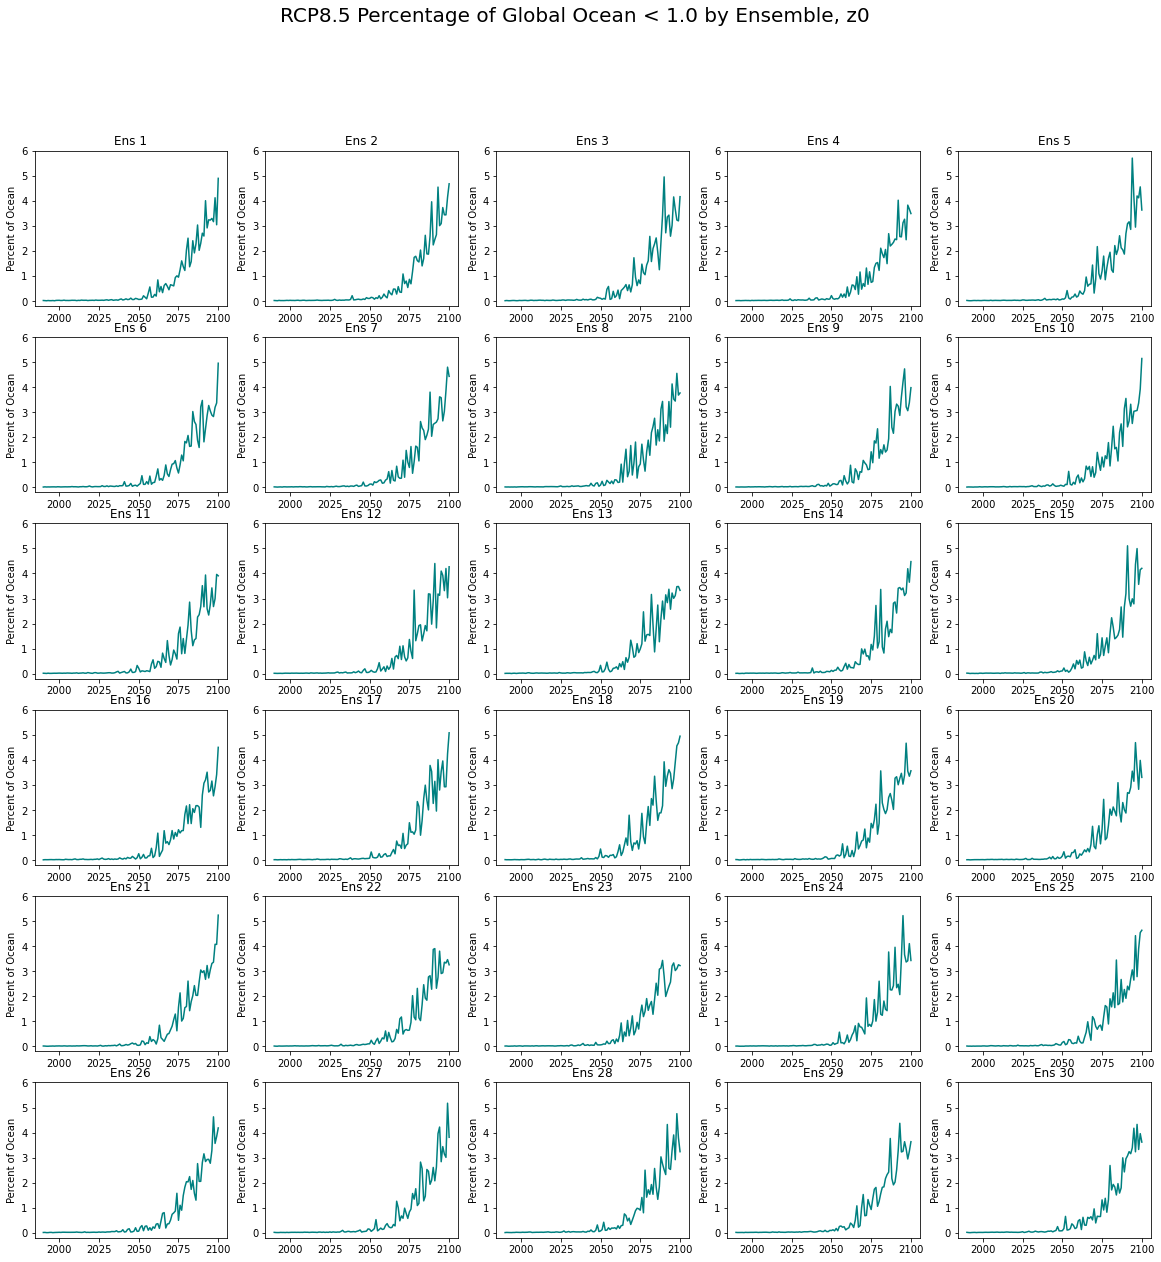

In [15]:
percent_ens(ds_all,'RCP8.5 Percentage of Global Ocean < 1.0 by Ensemble, z0', True, False, False, 'k01')

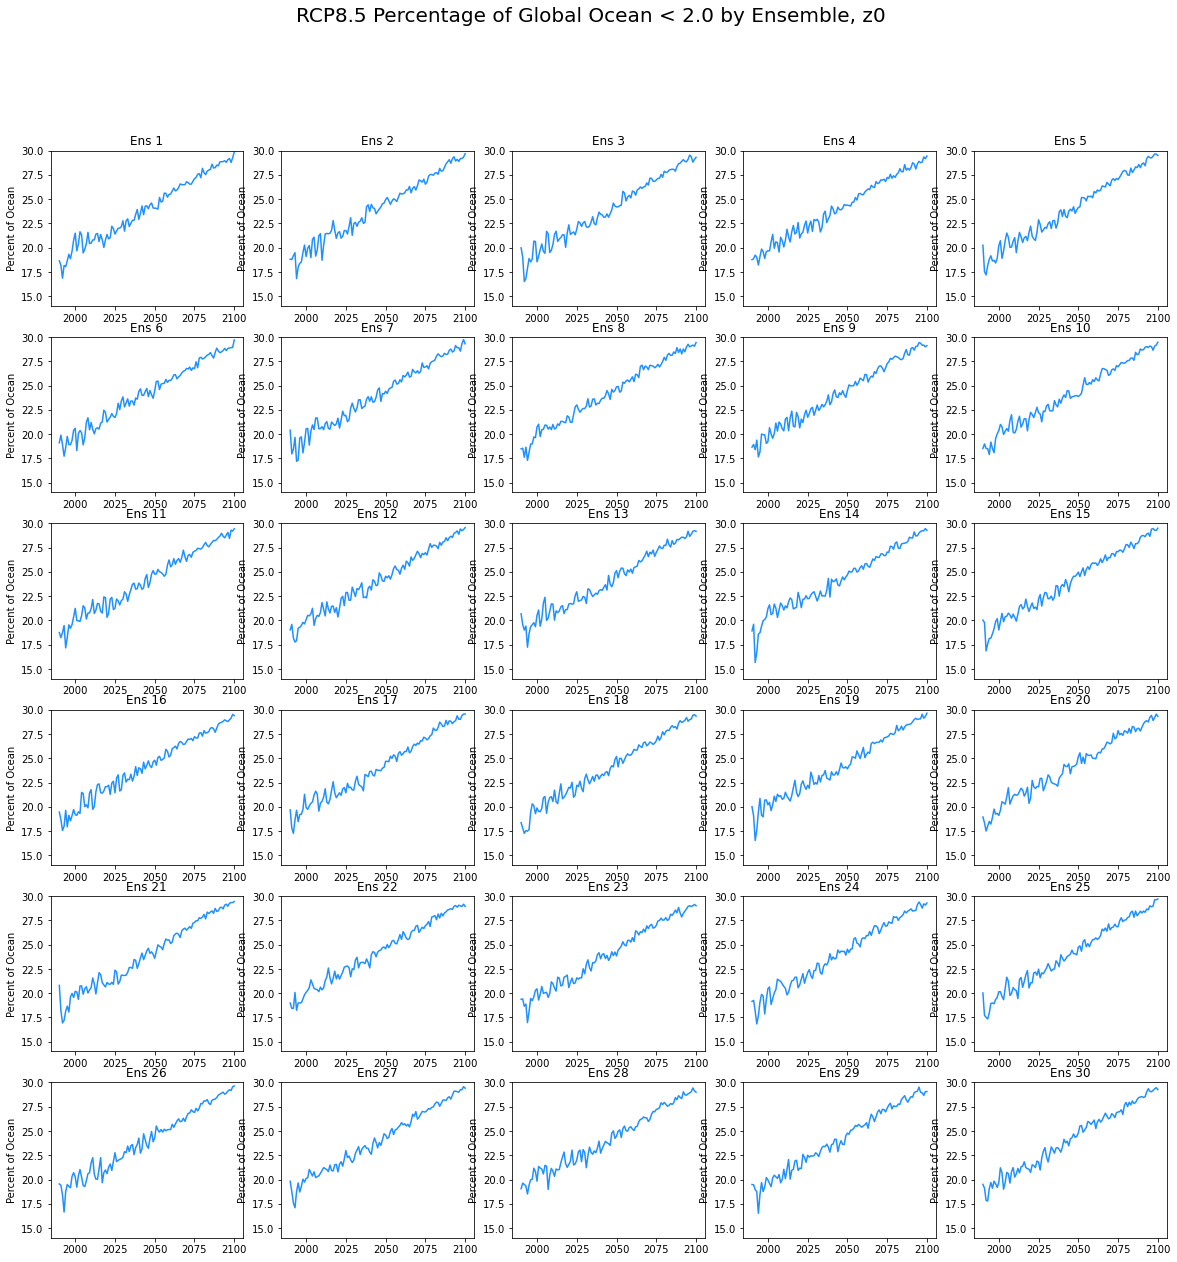

In [16]:
percent_ens(ds_all,'RCP8.5 Percentage of Global Ocean < 2.0 by Ensemble, z0', False, True, False, 'k01')

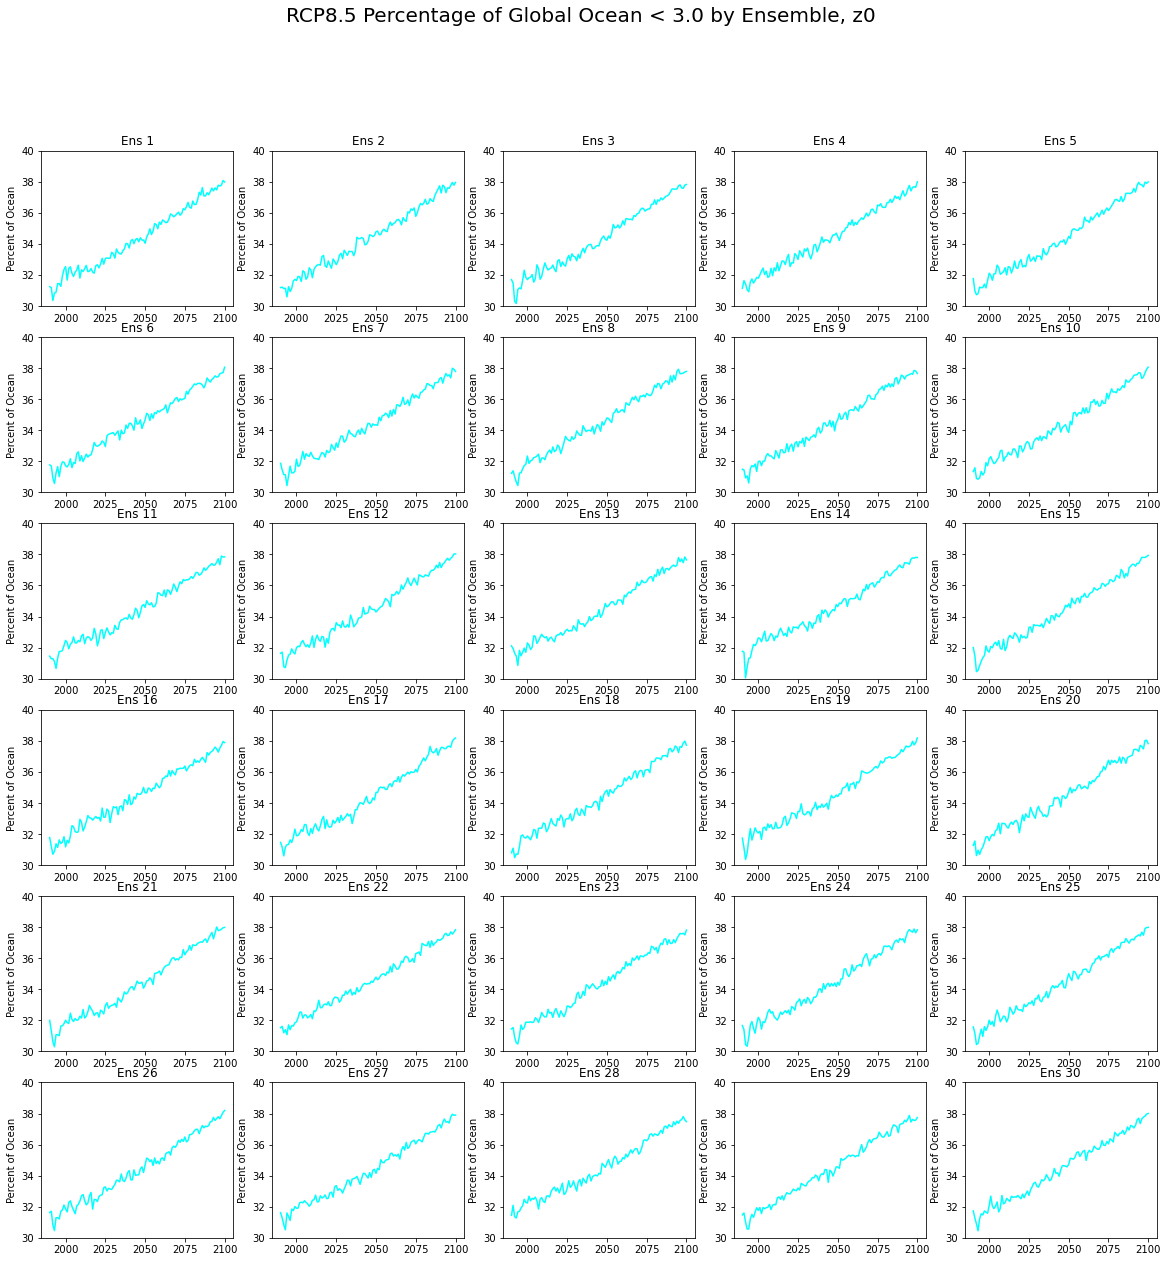

In [70]:
percent_ens(ds_all,'RCP8.5 Percentage of Global Ocean < 3.0 by Ensemble, z0', False, False, True, 'k01')

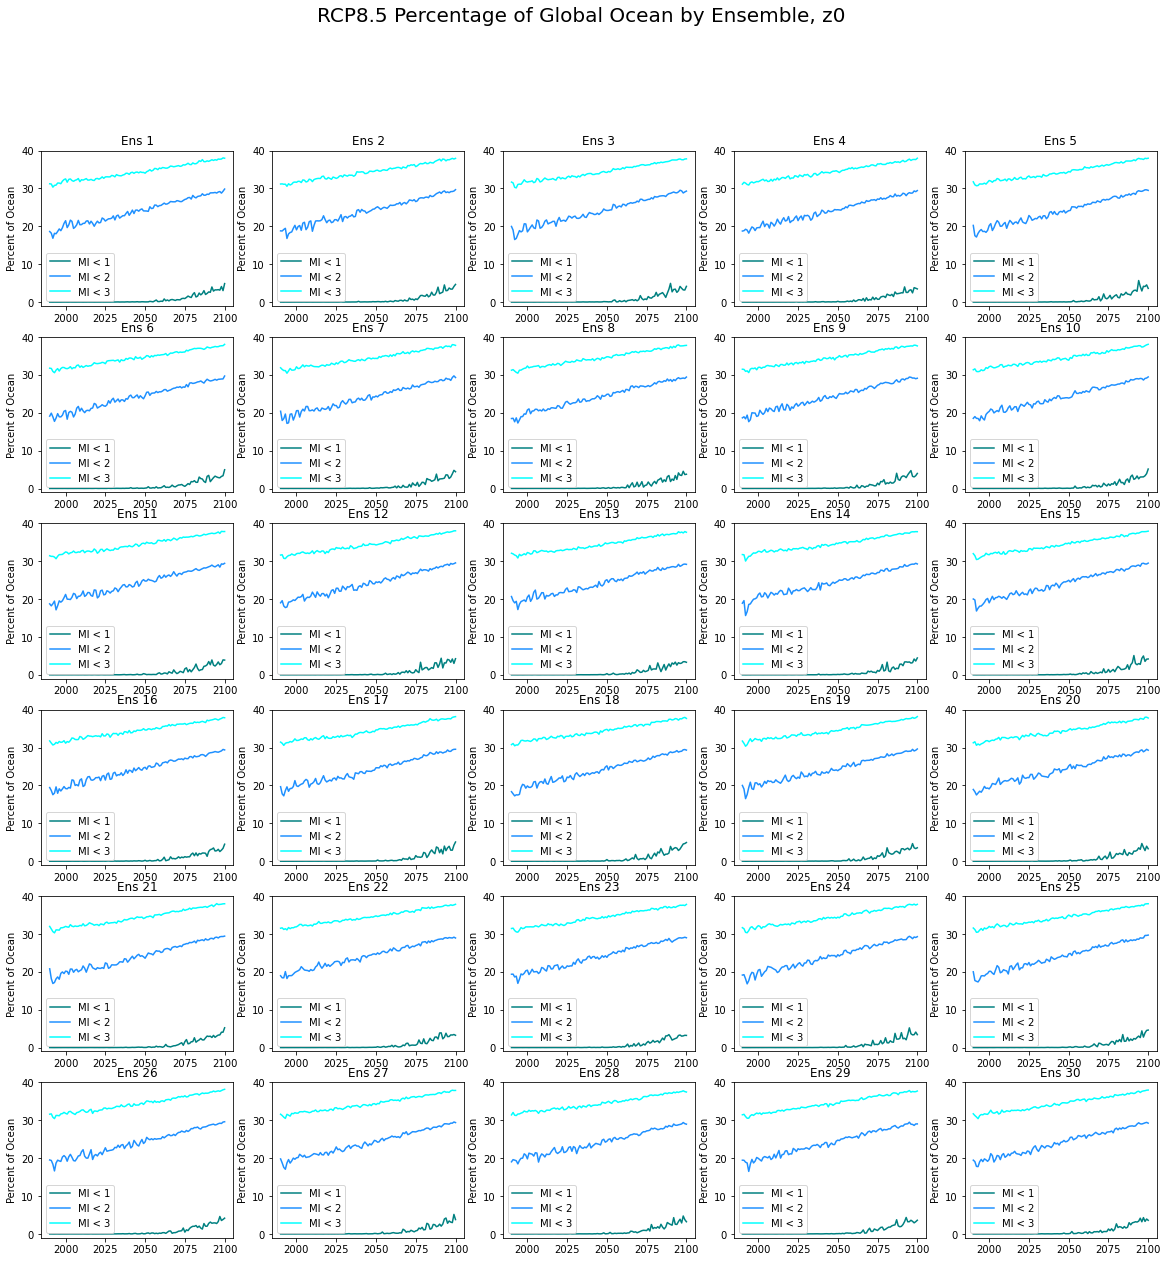

In [87]:
percent_ens(ds_all,'RCP8.5 Percentage of Global Ocean by Ensemble, z0', True, True, True, 'k01')

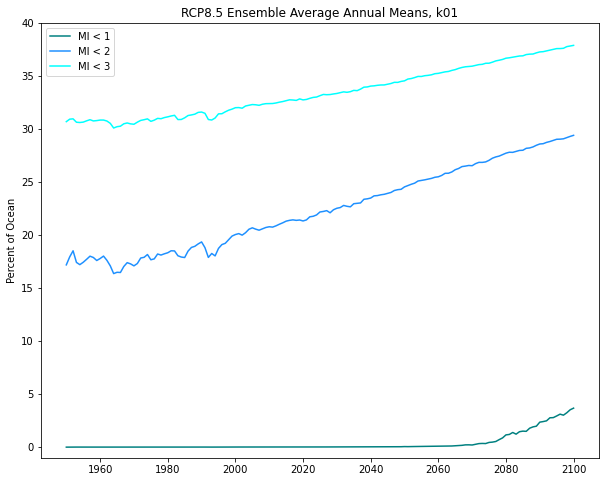

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
percent_plot(ds_z0avg,ax,'RCP8.5 Ensemble Average Annual Means, k01',True,True,True,None,None,'k01')

In [74]:
red_ens = ~np.isnan(ds_all.where(ds_all['MI']<1.0))
red_ens_sum = red_ens['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
percent_red_ens = (red_ens_sum/total)*100
ens = np.arange(0,30,1)

In [96]:
x = [0, 1, 2]
y = [0, 1, 2]
colors = [0]*30
for i in range(0,30):
    r = random.random()
    b = random.random()
    g = random.random()
    colors[i] = (r, g, b)

In [ ]:
ens = np.arange(0,30,1)

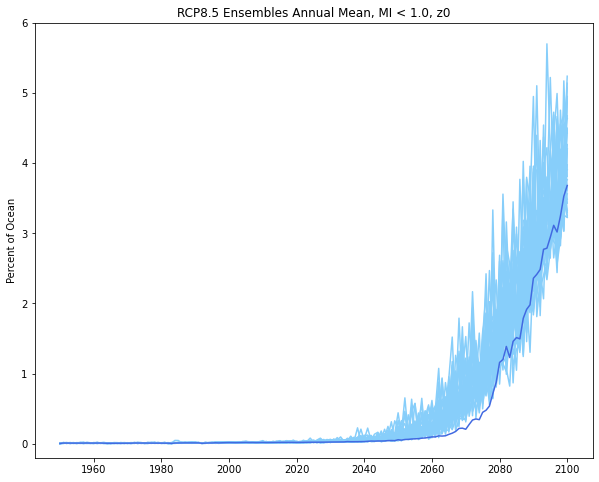

In [109]:
fig, ax = plt.subplots(figsize=(10,8))
wn.filterwarnings('ignore')
for mem in ens:
    percent_plot(ds_all.sel(ensemble=mem),ax,'RCP8.5 All Ensembles Annual Mean, MI < 1.0, z0',True,False,False,'lightskyblue')
percent_plot(ds_z0avg,ax,'RCP8.5 Ensembles Annual Mean, MI < 1.0, z0',True,False,False,'royalblue',None,'k01')

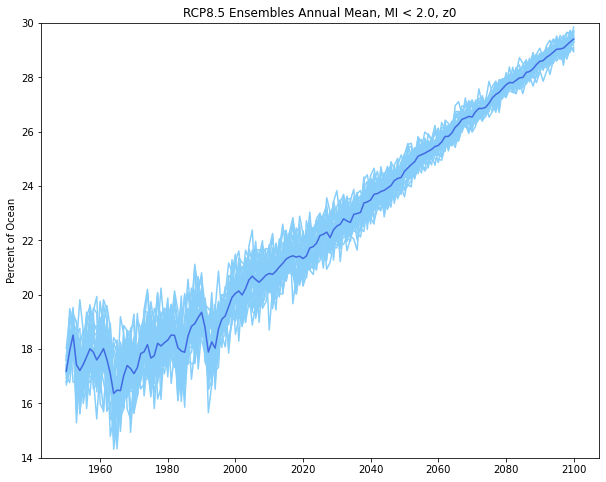

In [111]:
fig, ax = plt.subplots(figsize=(10,8))
wn.filterwarnings('ignore')
for mem in ens:
    percent_plot(ds_all.sel(ensemble=mem),ax,'RCP8.5 All Ensembles Annual Mean, MI < 2.0, z0',False,True,False,'lightskyblue')
percent_plot(ds_z0avg,ax,'RCP8.5 Ensembles Annual Mean, MI < 2.0, z0',False,True,False,'royalblue')

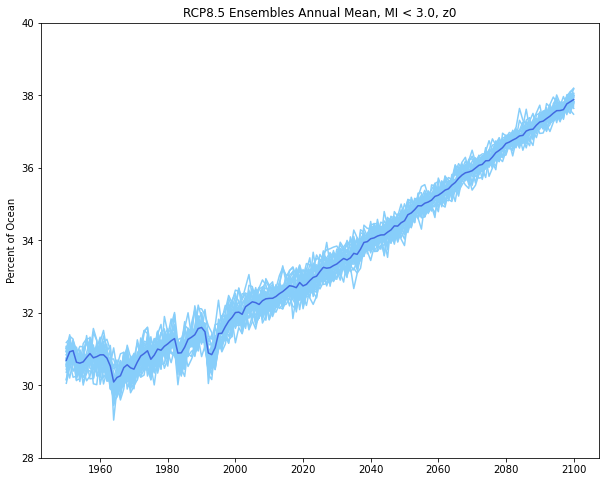

In [115]:
fig, ax = plt.subplots(figsize=(10,8))
wn.filterwarnings('ignore')
for mem in ens:
    percent_plot(ds_all.sel(ensemble=mem),ax,'RCP8.5 All Ensembles Annual Mean, MI < 3.0, z0',False,False,True,'lightskyblue')
percent_plot(ds_z0avg,ax,'RCP8.5 Ensembles Annual Mean, MI < 3.0, z0',False,False,True,'royalblue')

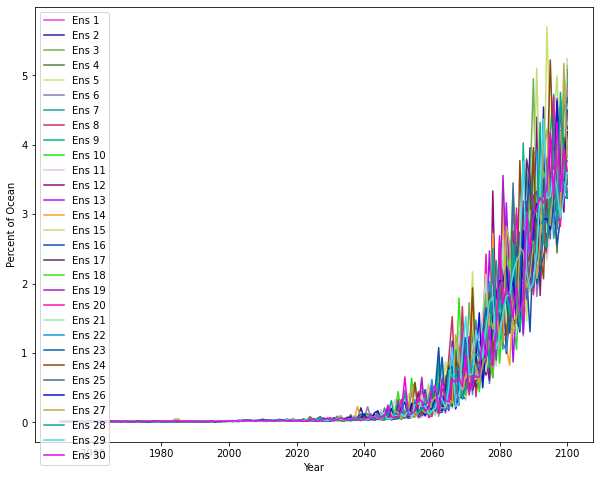

In [91]:
ens = np.arange(0,30,1)
fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylabel('Percent of Ocean')
ax.set_xlabel('Year')
wn.filterwarnings('ignore')

for mem in ens:
    ds = percent_red_ens.sel(ensemble=mem)
    ax.plot(np.unique(ds['time.year']),ds.groupby('time.year').mean(),c=colors[mem],label='Ens '+str(mem+1))
ax.legend(loc='upper left')

Depth irr0.1

In [23]:
irravgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_irr_0.1Wm2_1x1_ensAvg_1950_2100.nc'
ds_irrAvg = xr.open_dataset(irravgpath).rename({'XT_OCEAN':'xt_ocean', 'YT_OCEAN':'yt_ocean', 'TIME':'time'})

In [24]:
filename = 'MI_hitemp_sens_irr_0.1Wm2_1x1_ens*_1950_2100.nc'
path = rootdir+experiment+'/'+filename
ds_irrAll = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested').rename({'XT_OCEAN':'xt_ocean', 'YT_OCEAN':'yt_ocean', 'TIME':'time'})

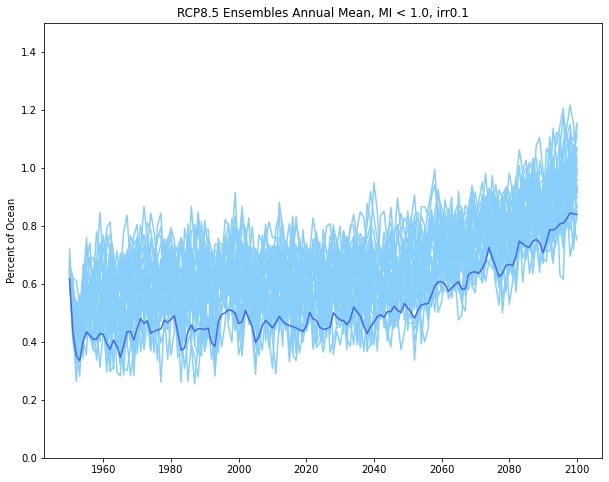

In [131]:
fig, ax = plt.subplots(figsize=(10,8))
wn.filterwarnings('ignore')
for mem in ens:
    percent_plot(ds_irrAll.sel(ensemble=mem),ax,'RCP8.5 All Ensembles Annual Mean, MI < 1.0, irr0.1',True,False,False,'lightskyblue')
percent_plot(ds_irrAvg,ax,'RCP8.5 Ensembles Annual Mean, MI < 1.0, irr0.1',True,False,False,'royalblue')

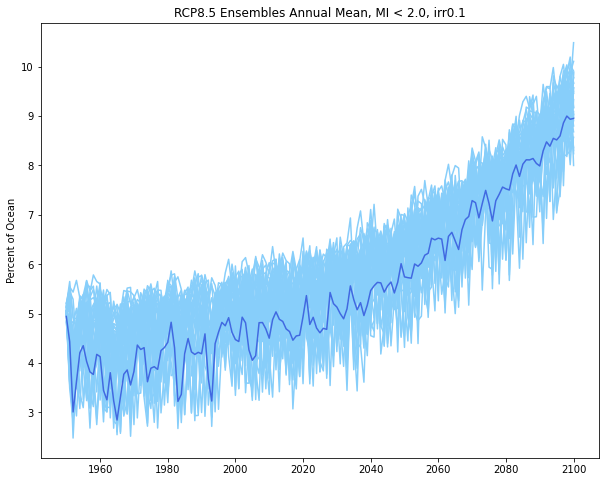

In [135]:
fig, ax = plt.subplots(figsize=(10,8))
wn.filterwarnings('ignore')
for mem in ens:
    percent_plot(ds_irrAll.sel(ensemble=mem),ax,'RCP8.5 All Ensembles Annual Mean, MI < 2.0, irr0.1',False,True,False,'lightskyblue')
percent_plot(ds_irrAvg,ax,'RCP8.5 Ensembles Annual Mean, MI < 2.0, irr0.1',False,True,False,'royalblue')

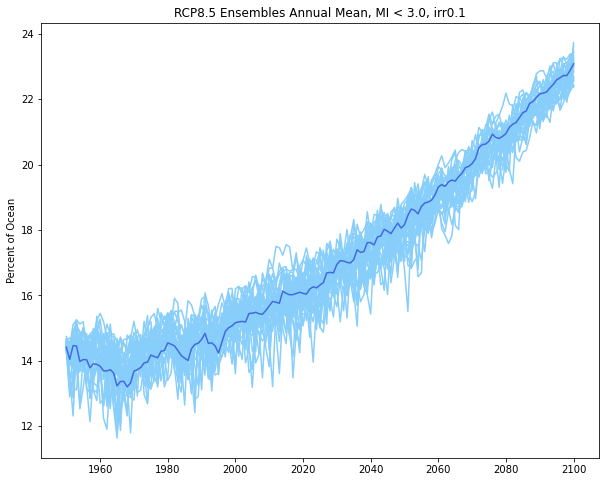

In [138]:
fig, ax = plt.subplots(figsize=(10,8))
wn.filterwarnings('ignore')
for mem in ens:
    percent_plot(ds_irrAll.sel(ensemble=mem),ax,'RCP8.5 All Ensembles Annual Mean, MI < 3.0, irr0.1',False,False,True,'lightskyblue')
percent_plot(ds_irrAvg,ax,'RCP8.5 Ensembles Annual Mean, MI < 3.0, irr0.1',False,False,True,'royalblue')

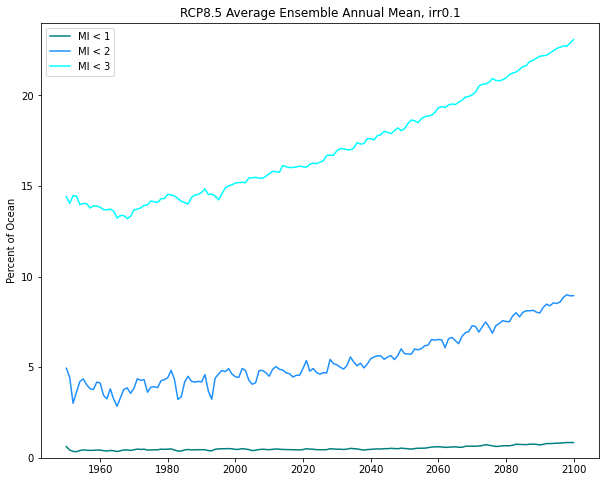

In [140]:
fig, ax = plt.subplots(figsize=(10,8))
percent_plot(ds_irrAvg,ax,'RCP8.5 Average Ensemble Annual Mean, irr0.1',True,True,True,None)

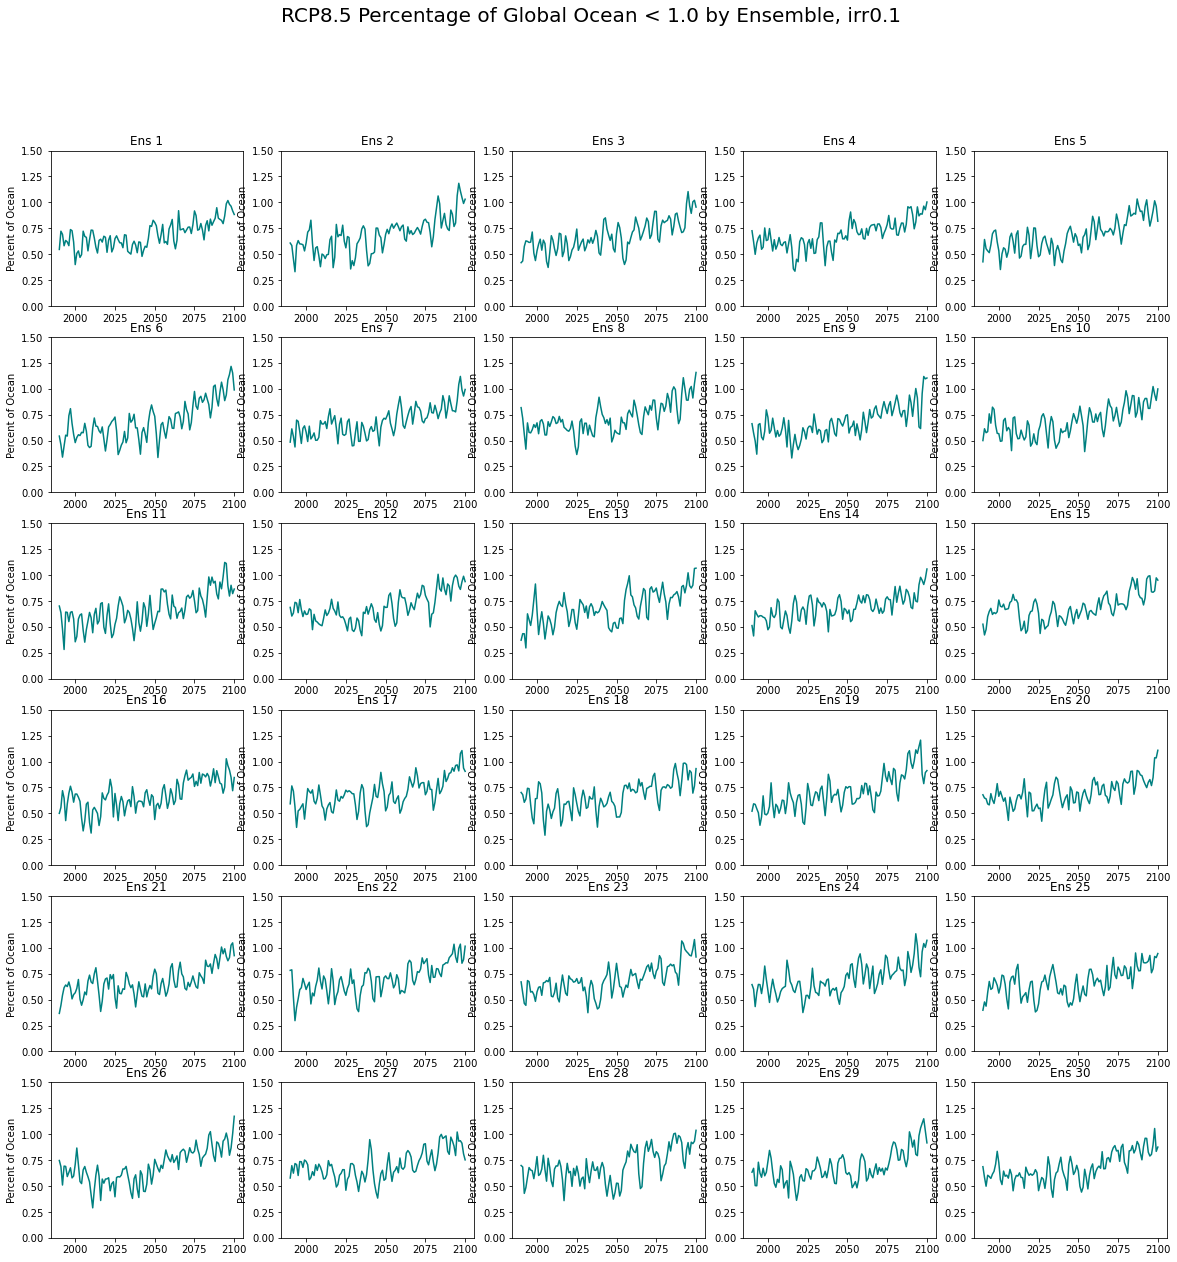

In [141]:
percent_ens(ds_irrAll,'RCP8.5 Percentage of Global Ocean < 1.0 by Ensemble, irr0.1', True, False, False)

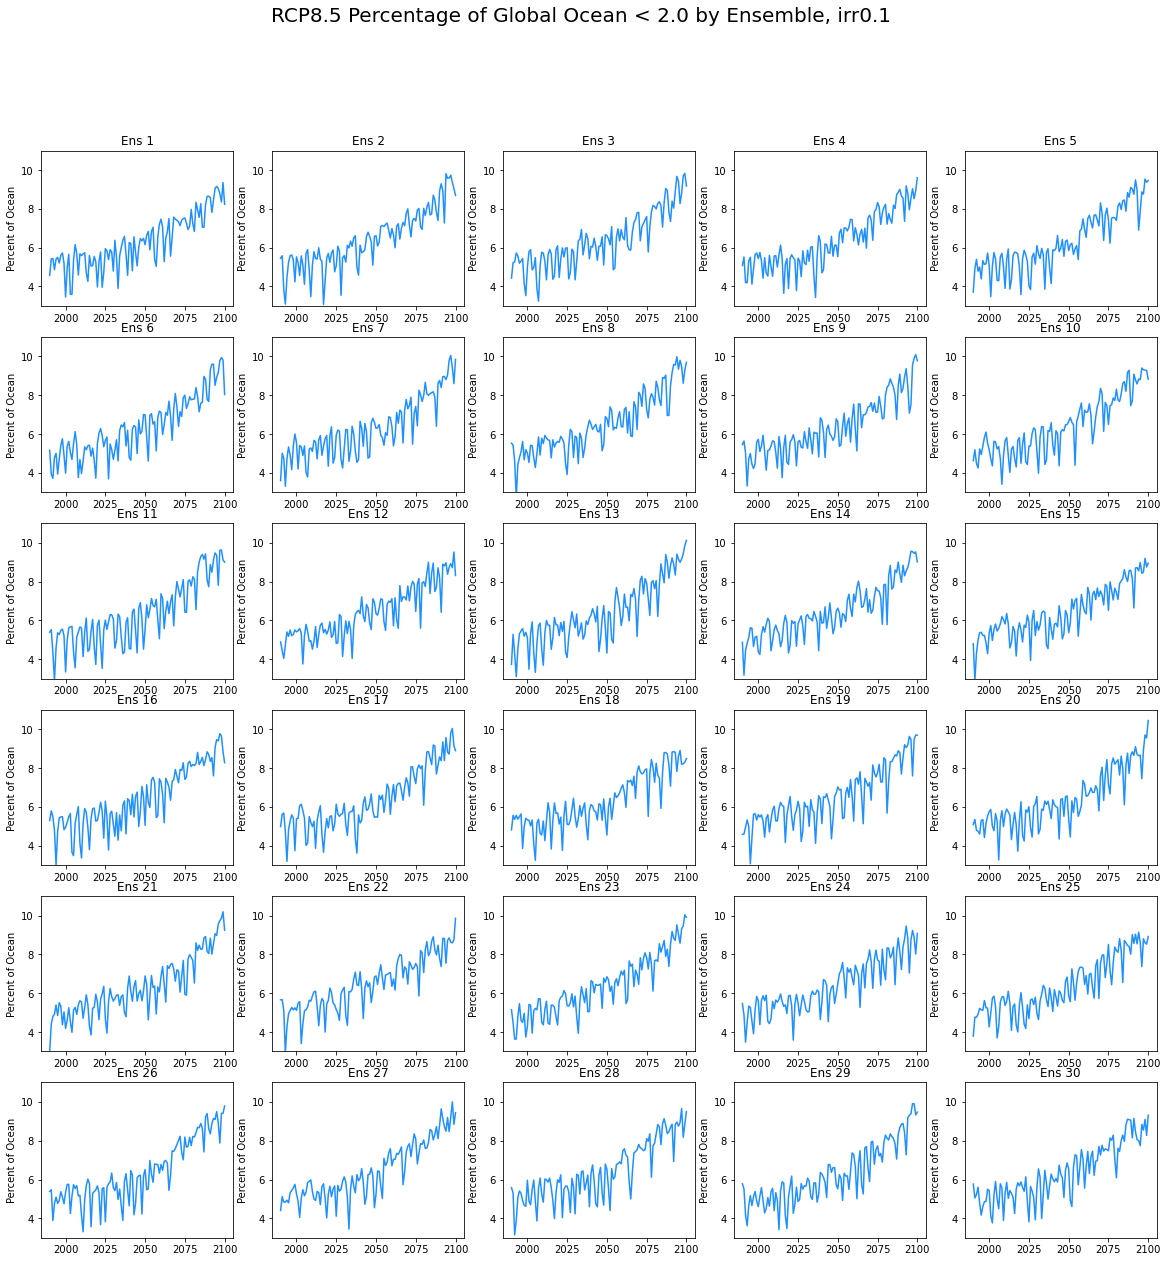

In [146]:
percent_ens(ds_irrAll,'RCP8.5 Percentage of Global Ocean < 2.0 by Ensemble, irr0.1', False, True, False)

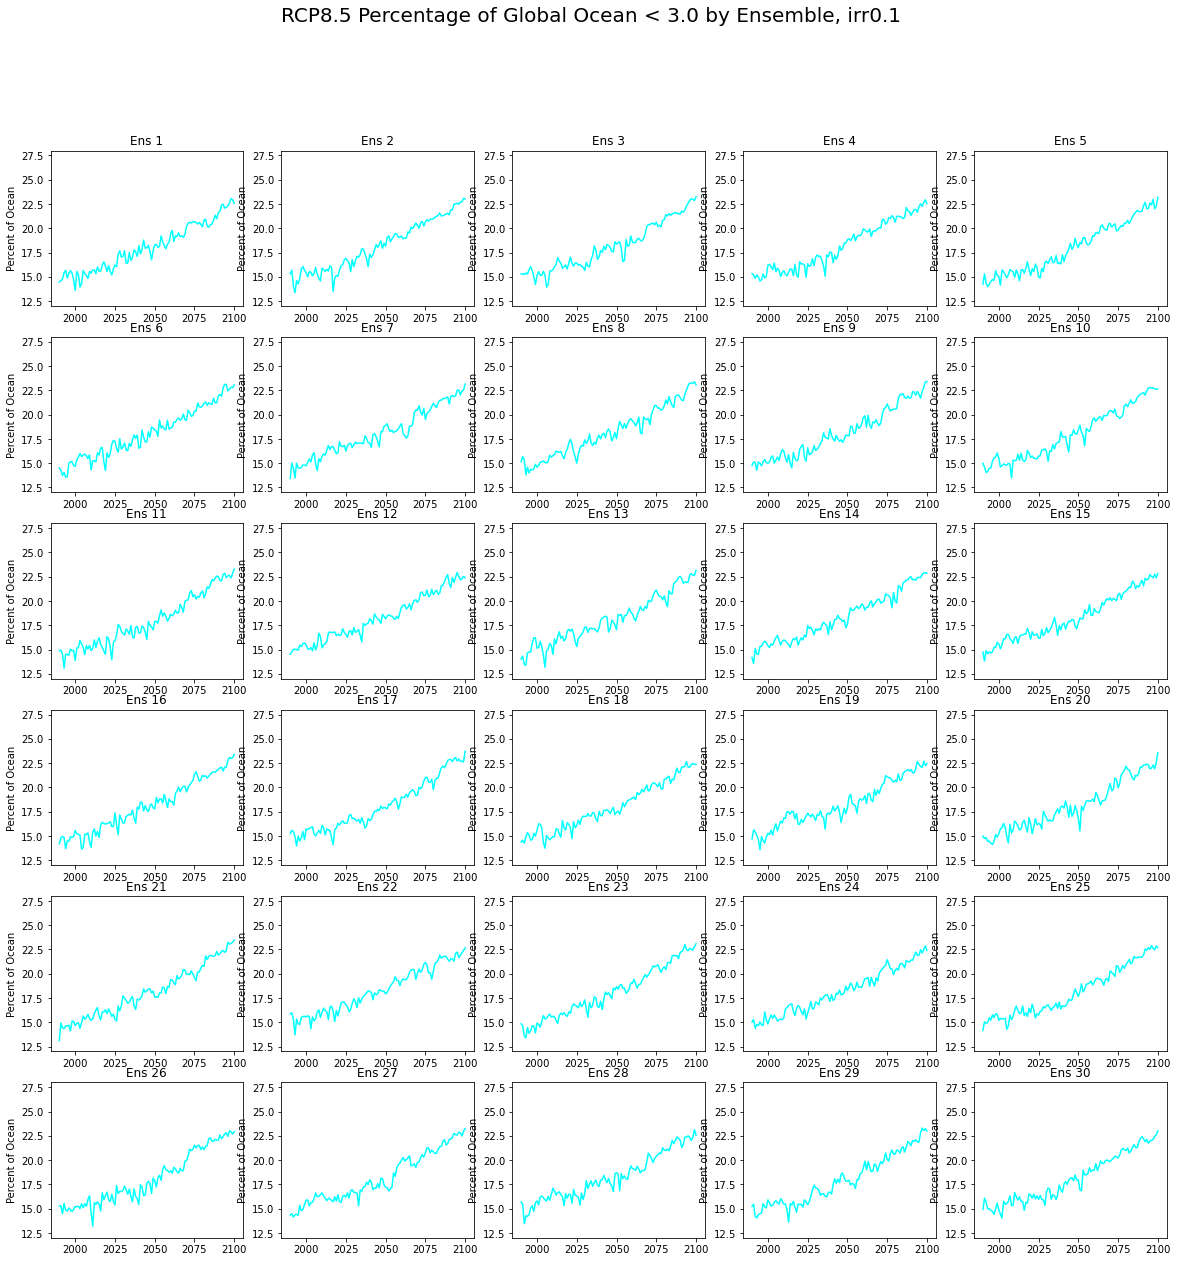

In [148]:
percent_ens(ds_irrAll,'RCP8.5 Percentage of Global Ocean < 3.0 by Ensemble, irr0.1', False, False, True)

Depth at K11

In [25]:
k11avgpath = '/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k11_ensAvg_1x1_1950_2100.nc'
ds_k11Avg = xr.open_dataset(k11avgpath)

In [26]:
filename = 'MI_hitemp_sens_k11_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
ds_k11All = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')

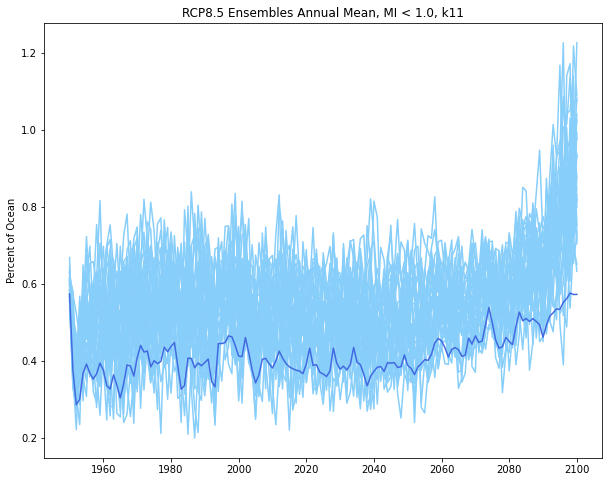

In [153]:
fig, ax = plt.subplots(figsize=(10,8))
wn.filterwarnings('ignore')
for mem in ens:
    percent_plot(ds_k11All.sel(ensemble=mem),ax,'RCP8.5 All Ensembles Annual Mean, MI < 1.0, k11',True,False,False,'lightskyblue')
percent_plot(ds_k11Avg,ax,'RCP8.5 Ensembles Annual Mean, MI < 1.0, k11',True,False,False,'royalblue')

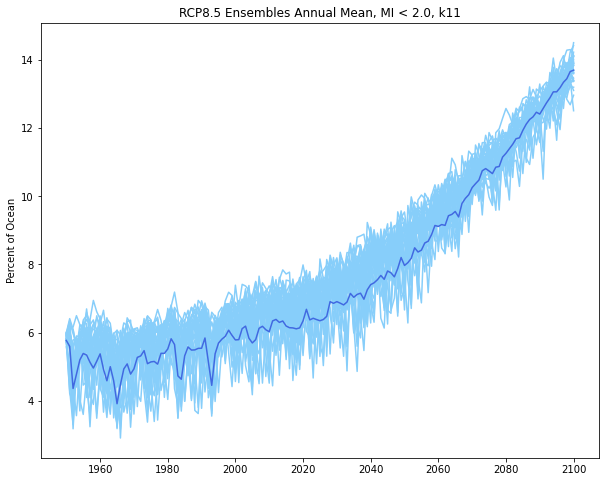

In [155]:
fig, ax = plt.subplots(figsize=(10,8))
wn.filterwarnings('ignore')
for mem in ens:
    percent_plot(ds_k11All.sel(ensemble=mem),ax,'RCP8.5 All Ensembles Annual Mean, MI < 2.0, k11',False,True,False,'lightskyblue')
percent_plot(ds_k11Avg,ax,'RCP8.5 Ensembles Annual Mean, MI < 2.0, k11',False,True,False,'royalblue')

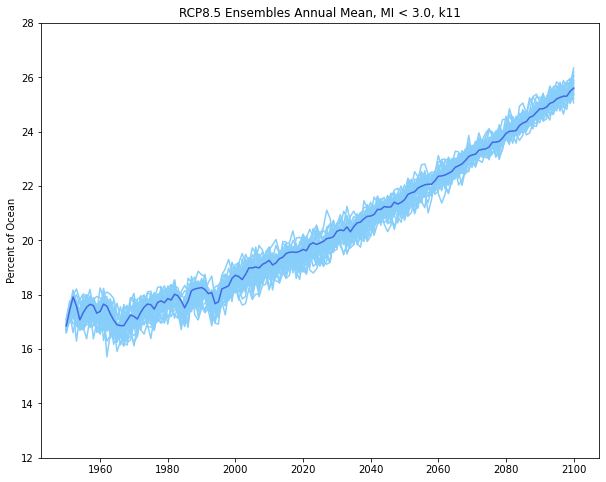

In [157]:
fig, ax = plt.subplots(figsize=(10,8))
wn.filterwarnings('ignore')
for mem in ens:
    percent_plot(ds_k11All.sel(ensemble=mem),ax,'RCP8.5 All Ensembles Annual Mean, MI < 3.0, k11',False,False,True,'lightskyblue')
percent_plot(ds_k11Avg,ax,'RCP8.5 Ensembles Annual Mean, MI < 3.0, k11',False,False,True,'royalblue')

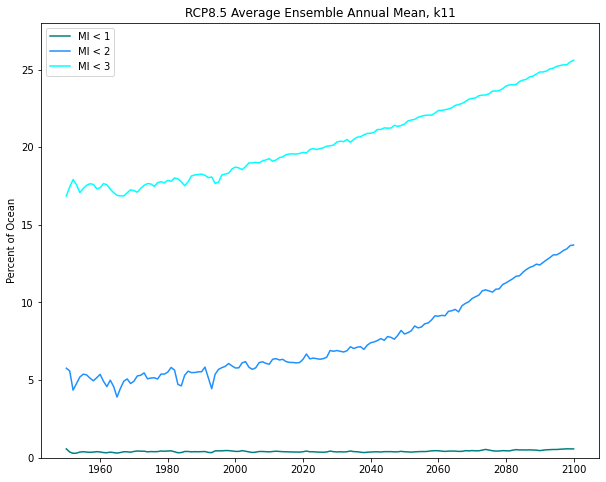

In [159]:
fig, ax = plt.subplots(figsize=(10,8))
percent_plot(ds_k11Avg,ax,'RCP8.5 Average Ensemble Annual Mean, k11',True,True,True,None)

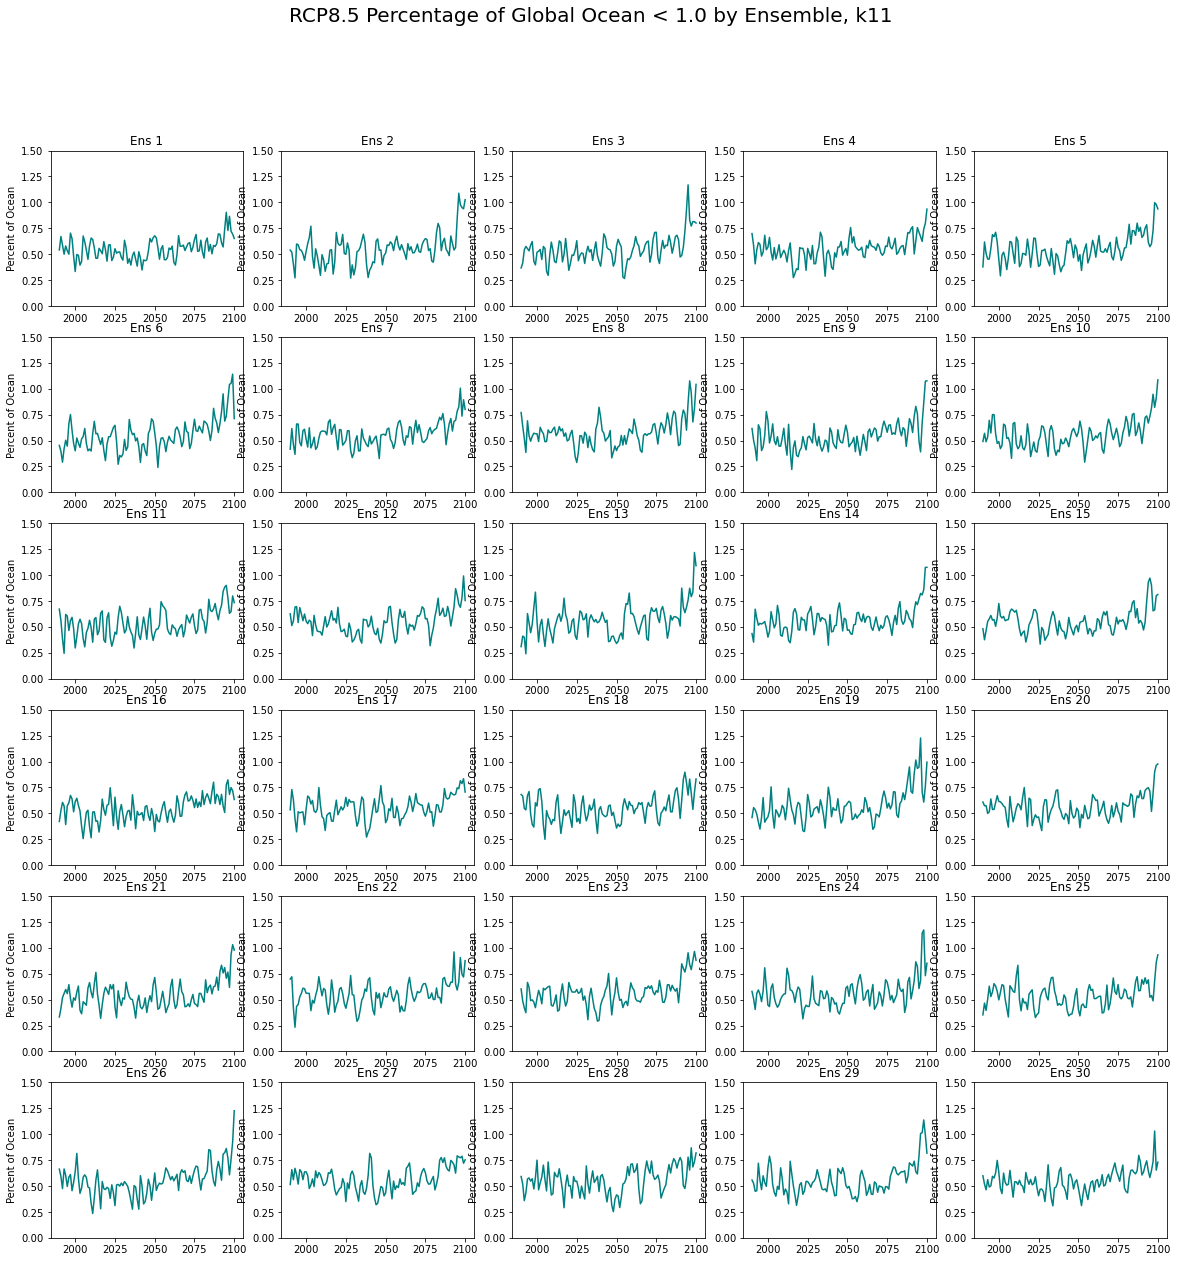

In [162]:
percent_ens(ds_k11All,'RCP8.5 Percentage of Global Ocean < 1.0 by Ensemble, k11', True, False, False)

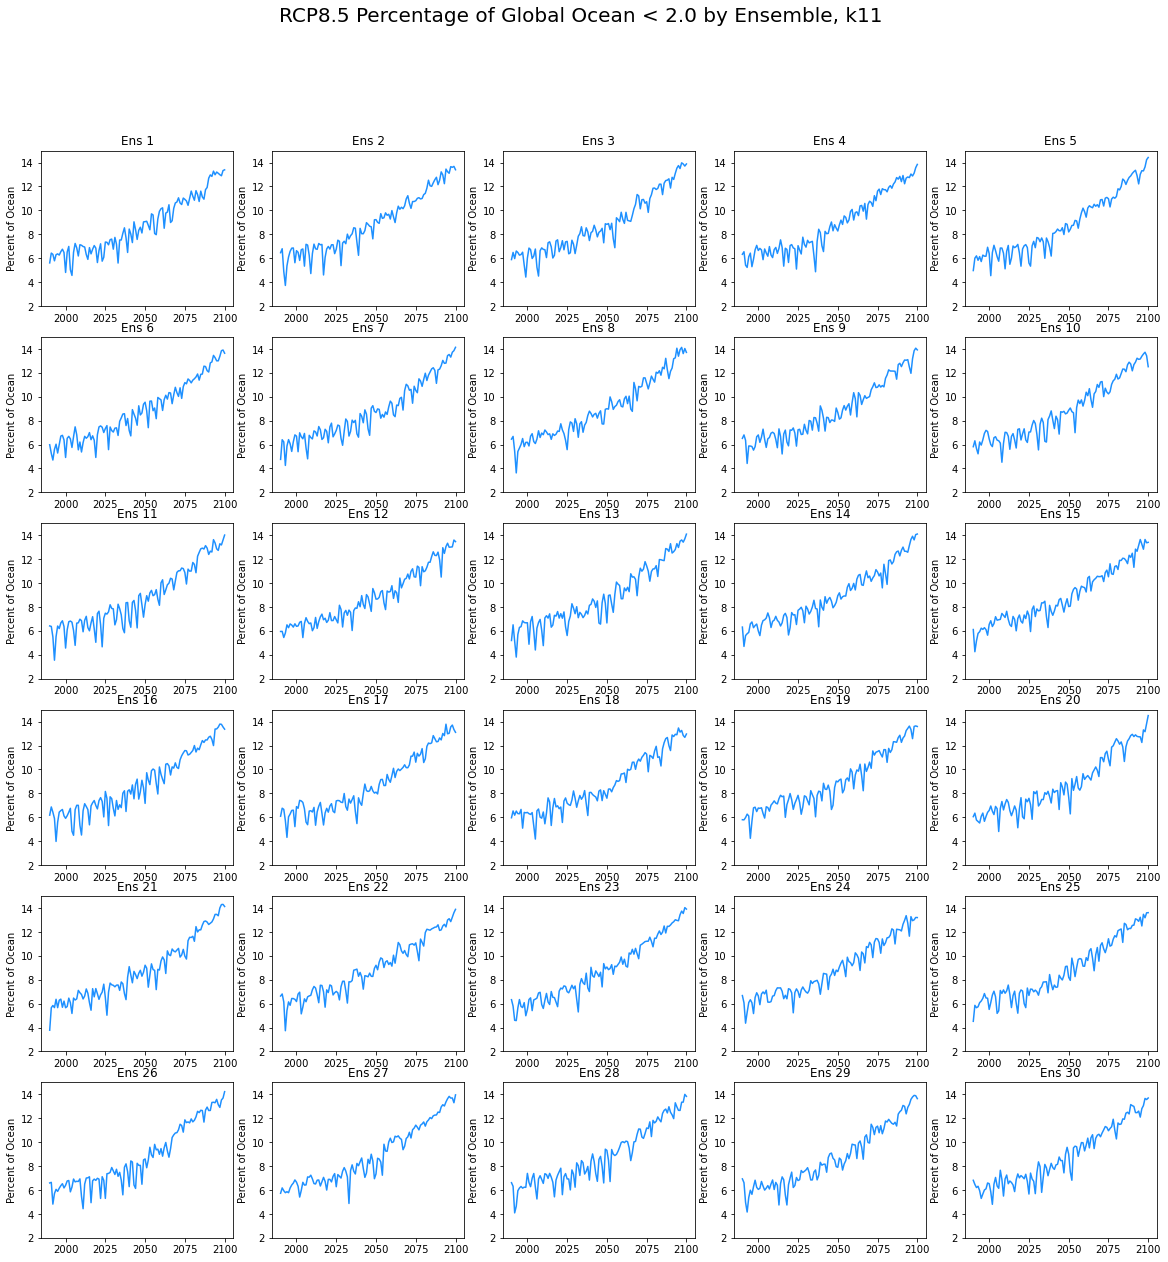

In [166]:
percent_ens(ds_k11All,'RCP8.5 Percentage of Global Ocean < 2.0 by Ensemble, k11', False, True, False)

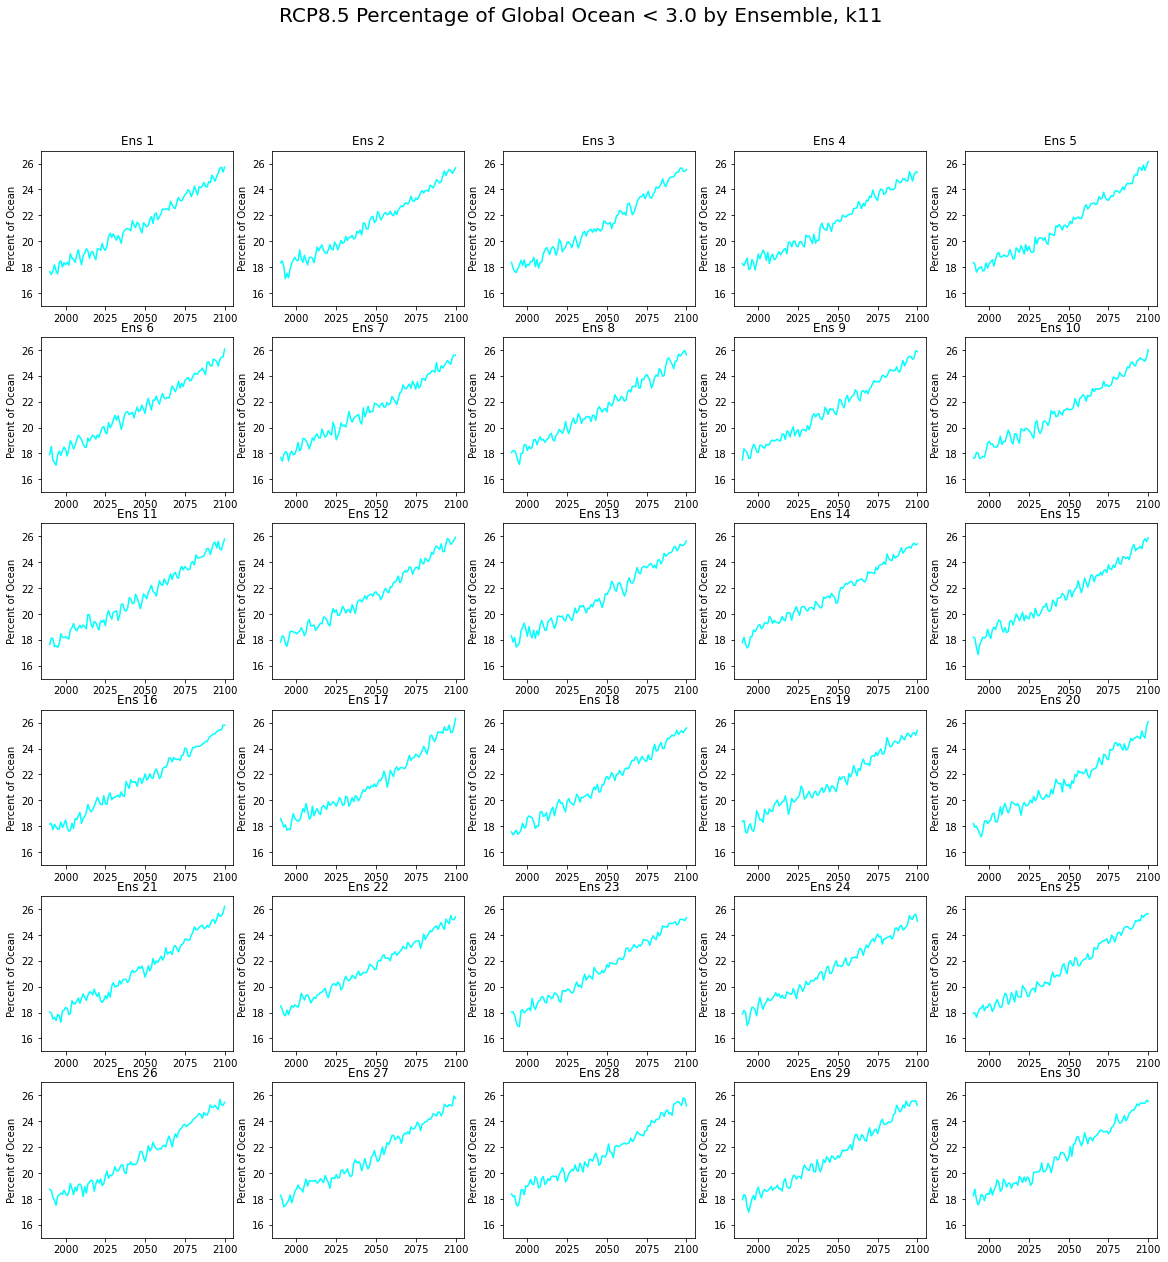

In [167]:
percent_ens(ds_k11All,'RCP8.5 Percentage of Global Ocean < 3.0 by Ensemble, k11', False, False, True)

Text(0.5, 0, 'Year')

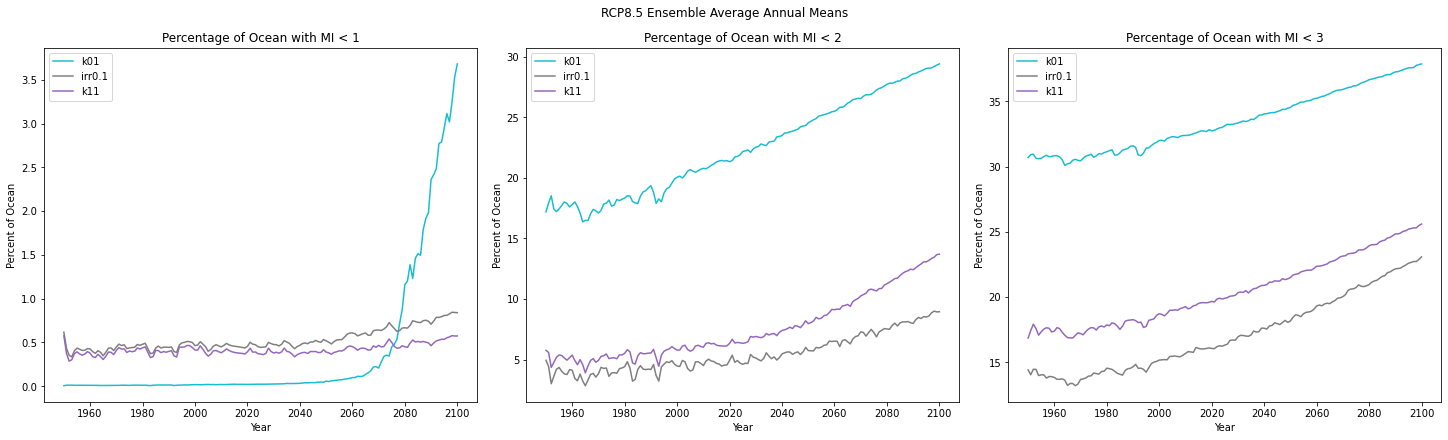

In [190]:
fig, (ax0,ax1,ax2) = plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)
fig.suptitle('RCP8.5 Ensemble Average Annual Means')
percent_plot(ds_z0avg, ax0, 'Percentage of Ocean with MI < 1', True, False, False, 'tab:cyan', 'k01')
percent_plot(ds_irrAvg, ax0, 'Percentage of Ocean with MI < 1', True, False, False, 'tab:gray', 'irr0.1')
percent_plot(ds_k11Avg, ax0, 'Percentage of Ocean with MI < 1', True, False, False, 'tab:purple', 'k11')
ax0.legend()
ax0.set_xlabel('Year')
percent_plot(ds_z0avg, ax1, 'Percentage of Ocean with MI < 2', False, True, False, 'tab:cyan', 'k01')
percent_plot(ds_irrAvg, ax1, 'Percentage of Ocean with MI < 2', False, True, False, 'tab:gray', 'irr0.1')
percent_plot(ds_k11Avg, ax1, 'Percentage of Ocean with MI < 2', False, True, False, 'tab:purple', 'k11')
ax1.legend()
ax1.set_xlabel('Year')
percent_plot(ds_z0avg, ax2, 'Percentage of Ocean with MI < 3', False, False, True, 'tab:cyan', 'k01')
percent_plot(ds_irrAvg, ax2, 'Percentage of Ocean with MI < 3', False, False, True, 'tab:gray', 'irr0.1')
percent_plot(ds_k11Avg, ax2, 'Percentage of Ocean with MI < 3', False, False, True, 'tab:purple', 'k11')
ax2.legend()
ax2.set_xlabel('Year')

Text(0.5, 0, 'Year')

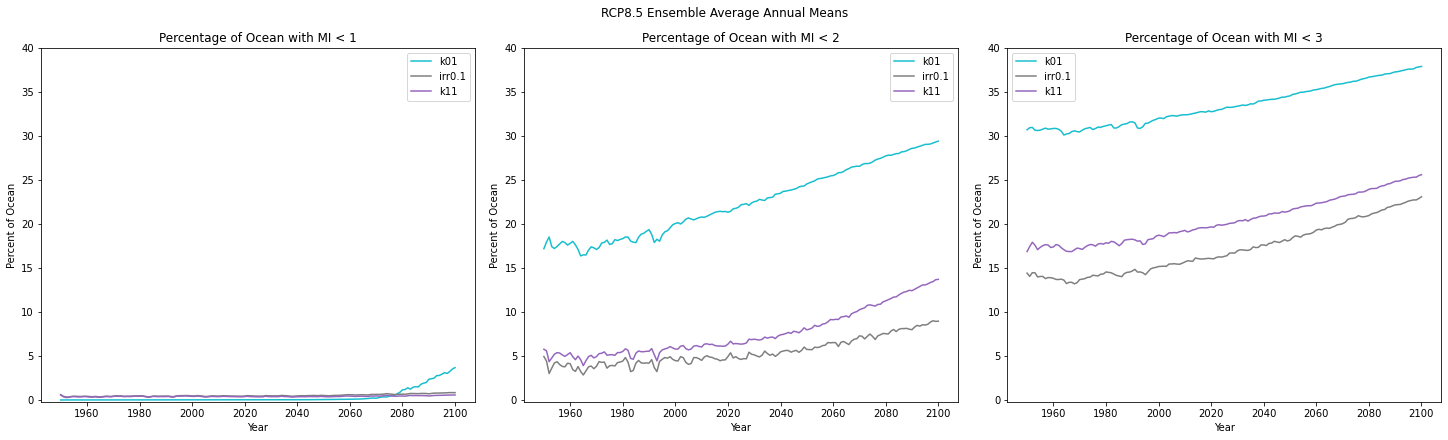

In [189]:
fig, (ax0,ax1,ax2) = plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)
fig.suptitle('RCP8.5 Ensemble Average Annual Means')

percent_plot(ds_z0avg, ax0, 'Percentage of Ocean with MI < 1', True, False, False, 'tab:cyan', 'k01')
percent_plot(ds_irrAvg, ax0, 'Percentage of Ocean with MI < 1', True, False, False, 'tab:gray', 'irr0.1')
percent_plot(ds_k11Avg, ax0, 'Percentage of Ocean with MI < 1', True, False, False, 'tab:purple', 'k11')
ax0.legend()
ax0.set_ylim(-0.2,40)
ax0.set_xlabel('Year')

percent_plot(ds_z0avg, ax1, 'Percentage of Ocean with MI < 2', False, True, False, 'tab:cyan', 'k01')
percent_plot(ds_irrAvg, ax1, 'Percentage of Ocean with MI < 2', False, True, False, 'tab:gray', 'irr0.1')
percent_plot(ds_k11Avg, ax1, 'Percentage of Ocean with MI < 2', False, True, False, 'tab:purple', 'k11')
ax1.legend()
ax1.set_ylim(-0.2,40)
ax1.set_xlabel('Year')

percent_plot(ds_z0avg, ax2, 'Percentage of Ocean with MI < 3', False, False, True, 'tab:cyan', 'k01')
percent_plot(ds_irrAvg, ax2, 'Percentage of Ocean with MI < 3', False, False, True, 'tab:gray', 'irr0.1')
percent_plot(ds_k11Avg, ax2, 'Percentage of Ocean with MI < 3', False, False, True, 'tab:purple', 'k11')
ax2.legend()
ax2.set_ylim(-0.2,40)
ax2.set_xlabel('Year')

Text(0.5, 0, 'Year')

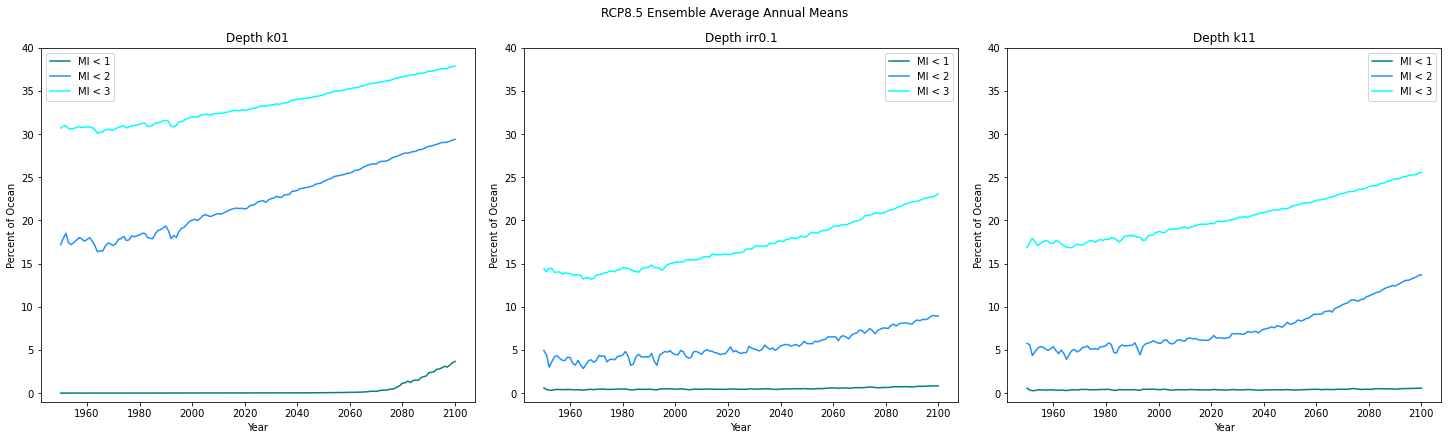

In [28]:
fig, (ax0,ax1,ax2) = plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)
fig.suptitle('RCP8.5 Ensemble Average Annual Means')

percent_plot(ds_z0avg, ax0, 'Depth k01', True, True, True, None, None, None)
# ax0.legend()
ax0.set_ylim(-1,40)
ax0.set_xlabel('Year')

percent_plot(ds_irrAvg, ax1, 'Depth irr0.1', True, True, True, None, None, None)
# ax0.legend()
ax1.set_ylim(-1,40)
ax1.set_xlabel('Year')

percent_plot(ds_k11Avg, ax2, 'Depth k11', True, True, True, None, None, None)
# ax0.legend()
ax2.set_ylim(-1,40)
ax2.set_xlabel('Year')